# titanic 데이터셋을 이용한 분석

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 분석

In [65]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 데이터 전처리

### NULL 처리

In [66]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
titanic_df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_9652\2378625290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9652\2378625290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 데이터 분포

In [67]:
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64
Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [68]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [69]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

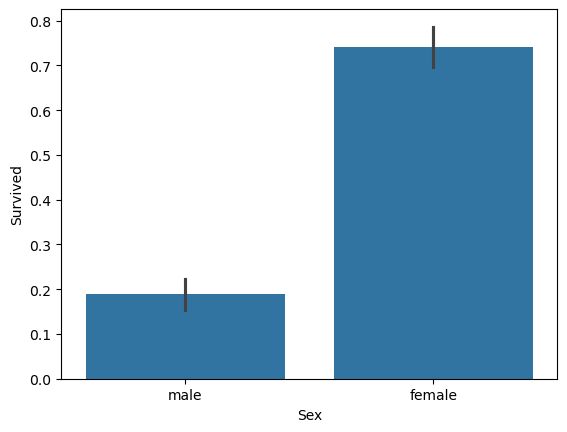

In [70]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()

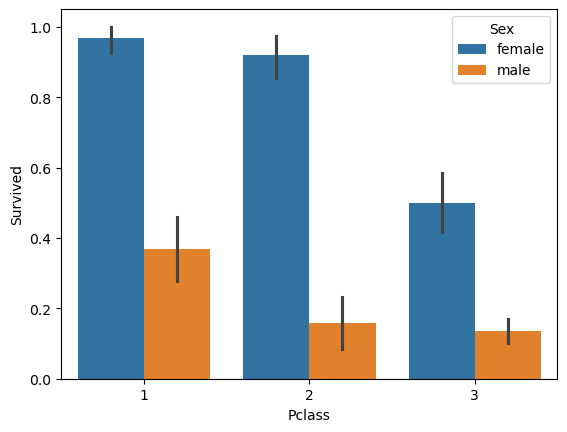

In [71]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

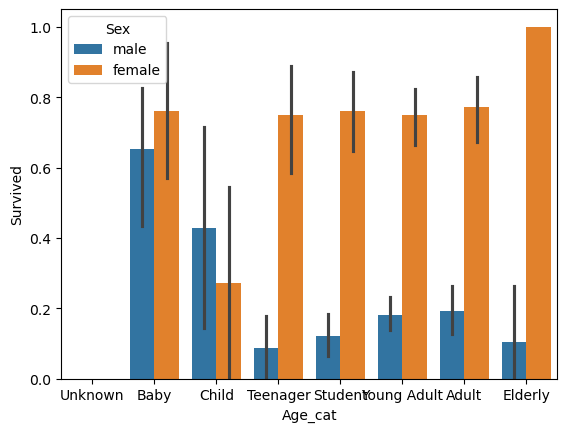

Age_cat
Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Elderly         22
Name: count, dtype: int64


In [72]:
def get_category(age):
    if age <= -1: return 'Unknown'
    elif age <= 5: return 'Baby'
    elif age <= 12: return 'Child'
    elif age <= 18: return 'Teenager'
    elif age <= 25: return 'Student'
    elif age <= 35: return 'Young Adult'
    elif age <= 60: return 'Adult'
    else: return 'Elderly'
    return 'X'

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
plt.show()
print(titanic_df['Age_cat'].value_counts())
titanic_df.drop('Age_cat', axis=1, inplace=True)

### Label Encoding

In [73]:
from sklearn import preprocessing
col_names = ['Cabin', 'Sex', 'Embarked']
for col_name in col_names:
    le = preprocessing.LabelEncoder()
    le = le.fit(titanic_df[col_name])
    titanic_df[col_name] = le.transform(titanic_df[col_name])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


### 불필요한 컬럼 제거

In [74]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


## 학습 데이터 분리

In [75]:
from sklearn.model_selection import train_test_split

y_titanic_s = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_s, test_size=0.2, random_state=11)

## 학습 및 평가

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
lr_clf.fit(x_train, y_train)

dt_pred = dt_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)
lr_pred = lr_clf.predict(x_test)

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
lr_acc = accuracy_score(y_test, lr_pred)

print('DecisionTreeClassifier accuracy: ', dt_acc)
print('RandomForestClassifier accuracy: ', rf_acc)
print('LogisticRegression accuracy: ', lr_acc)

DecisionTreeClassifier accuracy:  0.8268156424581006
RandomForestClassifier accuracy:  0.8491620111731844
LogisticRegression accuracy:  0.8491620111731844


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_s.values[train_index], y_titanic_s.values[test_index]
        # 학습 & 예측 & 정확도 계산
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("#{0}. 교차 검증 정확도: {1:.4f}".format(iter_count, accuracy))
    print("평균 정확도: {0:.4f}".format(np.mean(scores)))

exec_kfold(dt_clf, 5)

#0. 교차 검증 정확도: 0.7430
#1. 교차 검증 정확도: 0.7809
#2. 교차 검증 정확도: 0.7921
#3. 교차 검증 정확도: 0.7584
#4. 교차 검증 정확도: 0.8202
평균 정확도: 0.7789


In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_s, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('#{0}. 교차 검증 정확도: {1:.4f}'.format(iter_count, accuracy))
print('DecisionTreeClassifier accuracy: ', scores.mean())

#0. 교차 검증 정확도: 0.7374
#1. 교차 검증 정확도: 0.7809
#2. 교차 검증 정확도: 0.8034
#3. 교차 검증 정확도: 0.7753
#4. 교차 검증 정확도: 0.8371
DecisionTreeClassifier accuracy:  0.7868118762161822


In [79]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth':[2,3,5,10], 
    'min_samples_split': [2,3,5], 
    'min_samples_leaf':[1,5,8]
}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print(grid_dclf.best_params_)
print(grid_dclf.best_score_)

dpredictions = grid_dclf.best_estimator_.predict(x_test)
print(accuracy_score(y_test, dpredictions))

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.7991825076332119
0.8715083798882681


In [80]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}
grid_dclf = GridSearchCV(rf_clf, param_grid=rf_params, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print(grid_dclf.best_params_)
print(grid_dclf.best_score_)

dpredictions = grid_dclf.best_estimator_.predict(x_test)
print(accuracy_score(y_test, dpredictions))

{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100}
0.8146065202403232
0.8715083798882681


In [81]:
from sklearn.model_selection import GridSearchCV

lr_params = {
    'penalty': ['l2', 'l1'],  # l1은 solver='liblinear' 필요, l2는 default
    'C': [0.01, 0.1, 1, 10] # C는 정규화의 강도를 제어하는 파라미터
}
grid_dclf = GridSearchCV(lr_clf, param_grid=lr_params, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print(grid_dclf.best_params_)
print(grid_dclf.best_score_)

dpredictions = grid_dclf.best_estimator_.predict(x_test)
print(accuracy_score(y_test, dpredictions))

{'C': 10, 'penalty': 'l2'}
0.7823007977937555
0.8435754189944135


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameters = {
    'max_depth': randint(2, 20),           # 2 ~ 19 사이의 정수
    'min_samples_split': randint(2, 20),   # 2 ~ 19 사이의 정수
    'min_samples_leaf': randint(1, 10)     # 1 ~ 9 사이의 정수
}
random_search = RandomizedSearchCV(dt_clf, param_distributions=parameters, n_iter=10, scoring='accuracy', cv=5)
random_search.fit(x_train, y_train)

print(random_search.best_params_)
print(random_search.best_score_)

rpredictions = random_search.best_estimator_.predict(x_test)
print(accuracy_score(y_test, rpredictions))

{'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 4}
0.8104304146557668
0.8659217877094972
